The goal for this notebook will be two double-panel plots

1. A double-panel plot with percent error curves on the left, squared error curves on the right

2. A double-panel plot with median percent error histogram on the left, median squared error curves on the right

In [42]:
# First, load the emulator of choice
from cassL import train_emu as te
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [43]:
emu_name = "two_emu"

In [44]:
X_test = np.load("../../cassL/data_sets/" + emu_name + "/lhc_test_final.npy")
Y_test = np.load("../../cassL/data_sets/" + emu_name + "/samples_test.npy")

FileNotFoundError: [Errno 2] No such file or directory: '../../cassL/data_sets/two_emu/lhc_test_final.npy'

In [45]:
deltas = np.load("../../cassL/thesis_deltas/" + emu_name + ".npy")
percerr = np.load("../../cassL/thesis_percents/" + emu_name + ".npy")
colors = np.load("../../cassL/thesis_colors/" + emu_name + ".npy")

In [46]:
k_axis = np.load("../../cassL/data_sets/k/300k.npy")

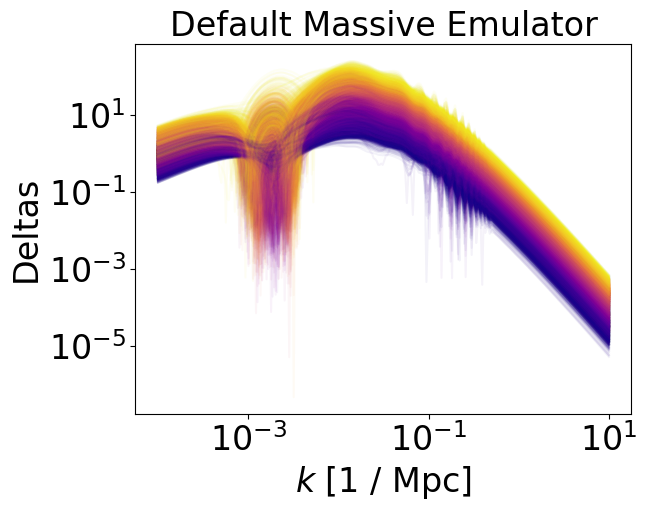

In [47]:
fig = plt.figure()
ax = fig.gca()

for i in range(len(deltas)):
    ax.loglog(k_axis, np.abs(deltas[i]), alpha=0.05, color=colors[i])    
    
ax.tick_params(labelsize=24)

ax.set_title("Default Massive Emulator", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel("Deltas", fontsize=24)

plt.savefig("nolog_noabs.png")

Text(0, 0.5, 'Percent Error')

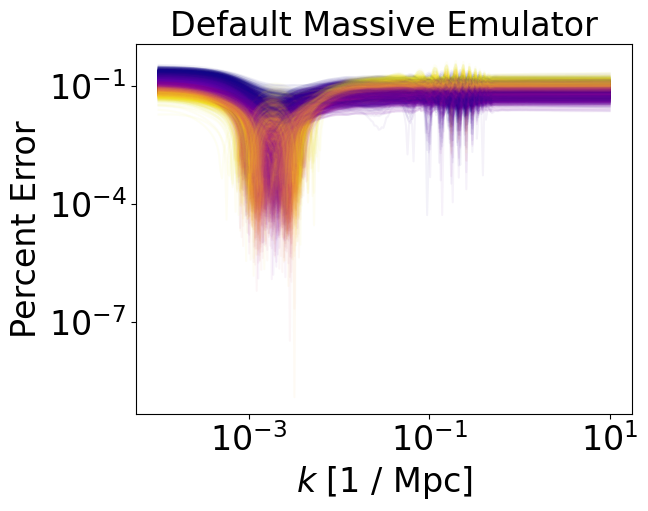

In [48]:
fig = plt.figure()
ax = fig.gca()

for i in range(len(percerr)):
    ax.loglog(k_axis, np.abs(percerr[i]), alpha=0.05, color=colors[i])
#ax.set_xscale('log')

ax.tick_params(labelsize=24)

ax.set_title("Default Massive Emulator", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel("Percent Error", fontsize=24)

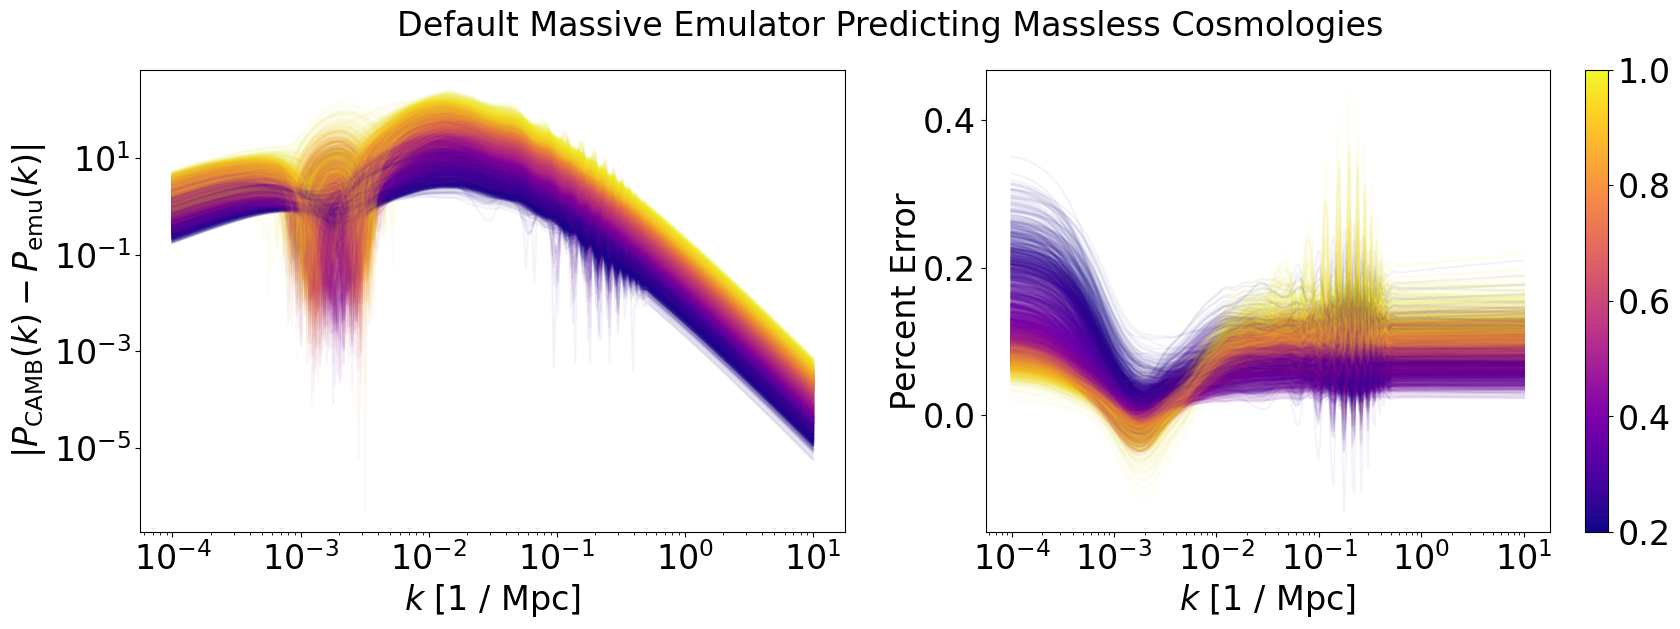

In [51]:
fig, axs = plt.subplots(1, 2, sharex="row", figsize=(20,6))

for i in range(len(percerr)):
    axs[0].loglog(k_axis, np.abs(deltas[i]), alpha=0.05, color=colors[i])
    axs[1].plot(k_axis, percerr[i], alpha=0.05, color=colors[i])

axs[0].tick_params(labelsize=24)    
    
#axs[0].set_title("Default Massive Emulator", fontsize=24)
axs[0].set_xlabel("$k$ [1 / Mpc]", fontsize=24)
axs[0].set_ylabel("|$P_\mathrm{CAMB}(k) - P_\mathrm{emu}(k)$|", fontsize=24)    
    
axs[1].set_xscale('log')

axs[1].tick_params(labelsize=24)

#axs[1].set_title("Default Massive Emulator", fontsize=24)
axs[1].set_xlabel("$k$ [1 / Mpc]", fontsize=24)
axs[1].set_ylabel("Percent Error", fontsize=24, labelpad=0)

norm = mpl.colors.Normalize(vmin=0.2, vmax=1.0)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm))
cbar.ax.tick_params(labelsize=24)

fig.suptitle("Default Massive Emulator Predicting Massless Cosmologies", fontsize=24)
plt.savefig("emu_test.png", bbox_inches="tight")